## Final Project : Classification

This is the benchmark solution for the **final project : classification**. In this notebook:

1. We will first explore the dataset provided
2. We will create models to predict whether a client will subscribe to a term deposit. 
3. We will also make predictions for the clients in the test set which you can submit in the solution_checker.xlsx file to generate accuracy score. 

Let's start by importing the libraries that we will be using.

In [1]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Let's check the features present in our data and then we will look at their data types.

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that **subscribed** is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [5]:
train.shape, test.shape

((31647, 18), (13564, 17))

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [6]:
# Print data types for each variable
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [7]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [8]:
train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64

<Axes: xlabel='subscribed'>

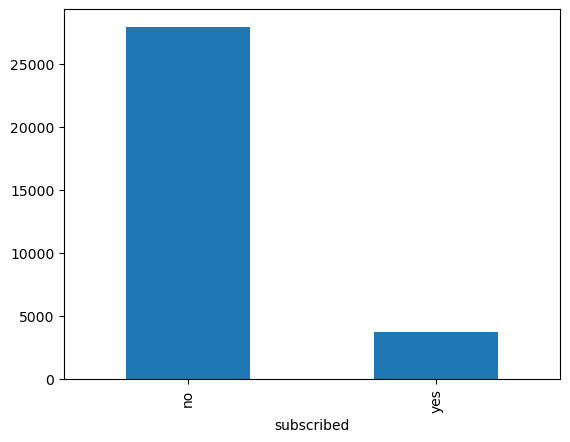

In [10]:
# plotting the bar plot of frequencies
train['subscribed'].value_counts().plot.bar()

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look  at the distribution of age variable to see how many people belongs to a particular age group.

<Axes: xlabel='age', ylabel='Density'>

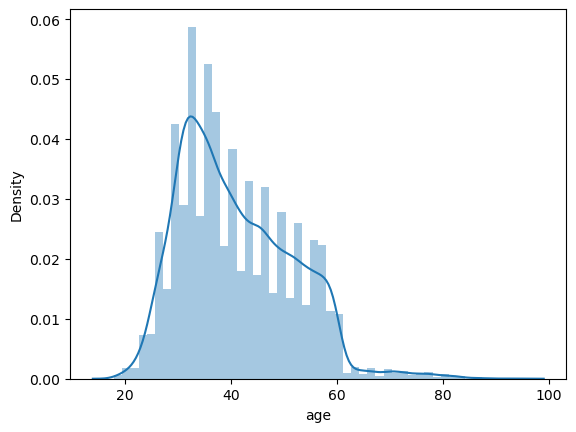

In [11]:
sn.distplot(train["age"])

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

<Axes: xlabel='job'>

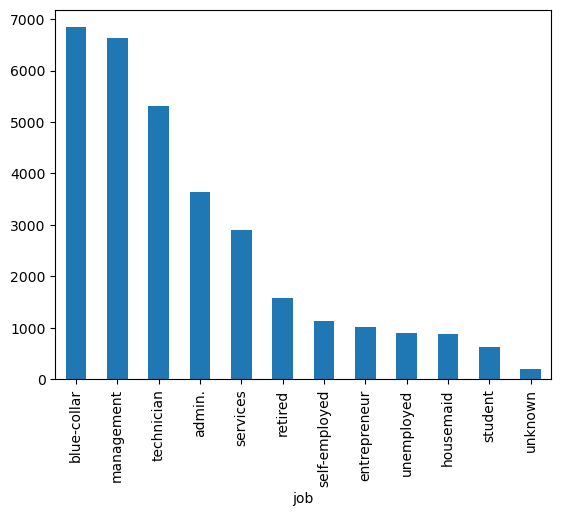

In [12]:
train['job'].value_counts().plot.bar()

We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. Let's also look at how many clients have default history.

<Axes: xlabel='default'>

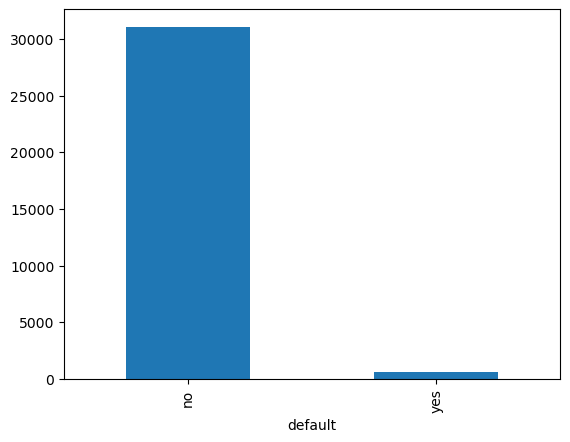

In [13]:
train['default'].value_counts().plot.bar()

More than 90% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

## Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

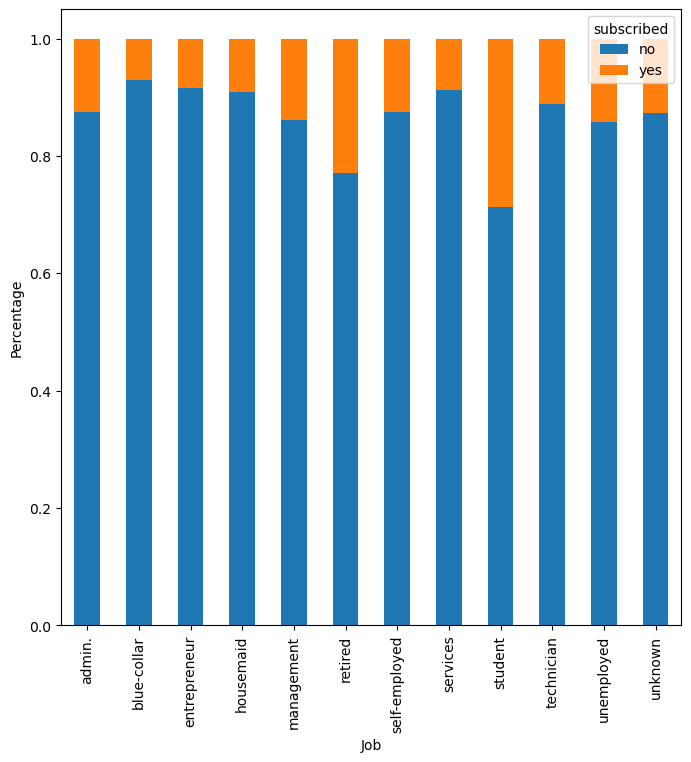

In [14]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

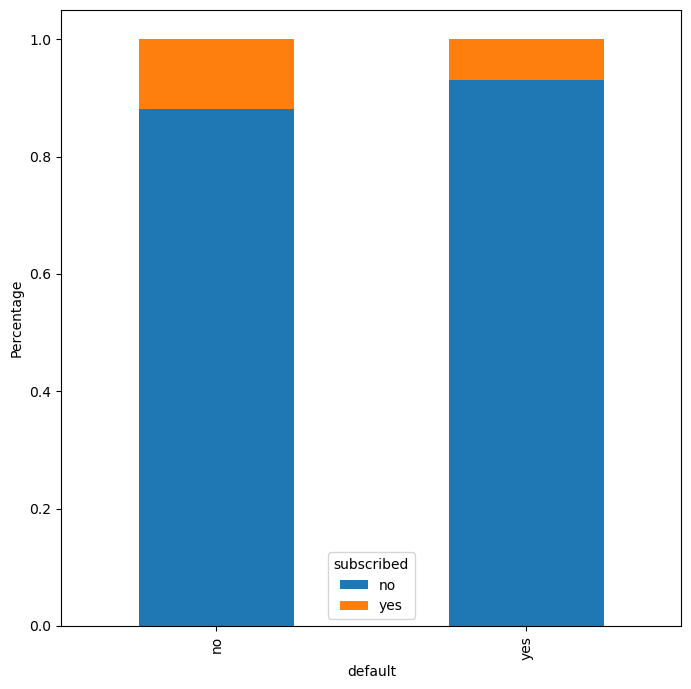

In [15]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [16]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [17]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset. 

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

## Model Building

In [18]:
target = train['subscribed']
train = train.drop('subscribed',axis = 1)

In [19]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set. 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# defining the logistic regression model
lreg = LogisticRegression()

In [24]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression()

In [25]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8872037914691943

We got an accuracy score of around 90% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity. 

Let's try decision tree algorithm now to check if we get better accuracy with that. 

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [30]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [31]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [32]:
# calculating the accuracy score
accuracy=accuracy_score(y_val, predict)

We got an accuracy of more than 90% on the validation set. You can try to improve the score by tuning hyperparameters of the model. Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [33]:
test = pd.get_dummies(test)

In [34]:
test_prediction = clf.predict(test)

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [35]:
submission = pd.DataFrame()

In [36]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction
submission['Accuracy']= accuracy

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

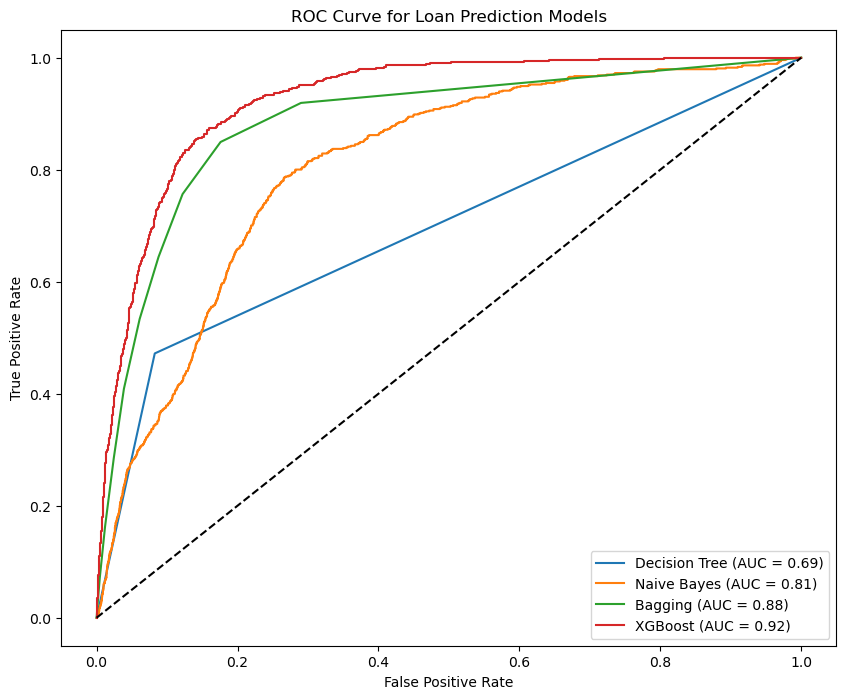

Model Metrics: {'Decision Tree': {'AUC': 0.6947207447880692, 'F1 Score': 0.4486345903771131}, 'Naive Bayes': {'AUC': 0.8064697404192512, 'F1 Score': 0.36270608300170554}, 'Bagging': {'AUC': 0.8845522541767157, 'F1 Score': 0.47955092221331197}, 'XGBoost': {'AUC': 0.9242448267950918, 'F1 Score': 0.5414110429447853}}


In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Encode categorical features
label_encoders = {}
for column in train_df.select_dtypes(include='object').columns:
    if column != 'subscribed':  # Exclude target column
        le = LabelEncoder()
        train_df[column] = le.fit_transform(train_df[column])
        test_df[column] = le.transform(test_df[column])
        label_encoders[column] = le

# Encode target variable
train_df['subscribed'] = train_df['subscribed'].apply(lambda x: 1 if x == 'yes' else 0)

# Split features and target
X = train_df.drop(['ID', 'subscribed'], axis=1)
y = train_df['subscribed']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.transform(test_df.drop(['ID'], axis=1))

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Bagging": BaggingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=50)
}

# Store metrics
model_metrics = {}
plt.figure(figsize=(10, 8))

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Calculate metrics
    auc_score = roc_auc_score(y_val, y_proba)
    f1 = f1_score(y_val, y_pred)
    
    # Store results
    model_metrics[name] = {"AUC": auc_score, "F1 Score": f1}

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Finalize the ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Loan Prediction Models")
plt.legend(loc="lower right")
plt.show()

print("Model Metrics:", model_metrics)


In [38]:
def predict_loan_eligibility(user_data, model, label_encoders, scaler):
    # Encode and scale user input
    for col, le in label_encoders.items():
        if col in user_data:
            user_data[col] = le.transform([user_data[col]])[0]
    
    user_data = pd.DataFrame([user_data])
    user_data_scaled = scaler.transform(user_data)
    
    # Predict
    prediction = model.predict(user_data_scaled)[0]
    return "Eligible for loan" if prediction == 1 else "Not eligible for loan"

# Example usage
user_input = {
    'age': 35,
    'job': 'technician',
    'marital': 'married',
    'education': 'secondary',
    'default': 'no',
    'balance': 1000,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'day': 5,
    'month': 'jul',
    'duration': 300,
    'campaign': 2,
    'pdays': -1,
    'previous': 0,
    'poutcome': 'unknown'
}

# Assuming XGBoost model performed best
print(predict_loan_eligibility(user_input, models["XGBoost"], label_encoders, scaler))


Not eligible for loan


CHECK YOU ELIGIBILITY FOR AVAILING LOAN

Model Performance:
AUC-ROC Score: 0.86
F1 Score: 0.35


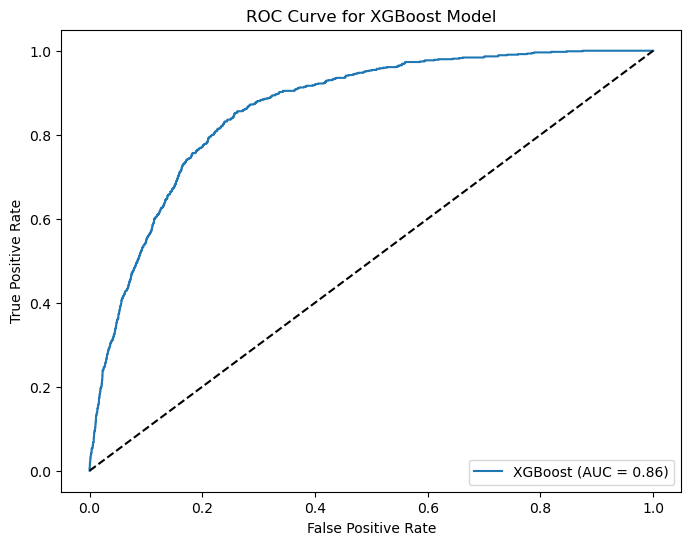

Please provide the following information to check loan eligibility:


Age (e.g., 35):  22


Job options: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown


Job (e.g., technician):  blur-collar


Invalid job. Please choose from the listed options.


Job (e.g., technician):  student
Account Balance (e.g., 1000):  1000000


Housing options: no, yes


Housing (yes/no):  yes


Loan options: no, yes


Existing Loan (yes/no):  no
Duration of last contact in seconds (e.g., 300):  50



--- Prediction Result ---
Eligibility: Not eligible for loan
Recommendations to improve eligibility:
- Engage in longer discussions with bank agents to potentially increase eligibility.


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load the Data
def load_data(train_path='train.csv', test_path='test.csv'):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    return train_df, test_df

# Step 2: Data Preprocessing
def preprocess_data(train_df, selected_features):
    # Encode target variable
    train_df['subscribed'] = train_df['subscribed'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
    
    # Select only the required features
    X = train_df[selected_features]
    y = train_df['subscribed']
    
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include='object').columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Initialize LabelEncoders for categorical features
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le
    
    # Initialize and fit the scaler on numerical features
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    
    return X, y, label_encoders, scaler

# Step 3: Train the Model
def train_model(X, y):
    # Split the data
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Initialize the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_estimators=100
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    auc_score = roc_auc_score(y_val, y_proba)
    f1 = f1_score(y_val, y_pred)
    
    print(f"Model Performance:\nAUC-ROC Score: {auc_score:.2f}\nF1 Score: {f1:.2f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for XGBoost Model")
    plt.legend(loc="lower right")
    plt.show()
    
    return model

# Step 4: Function to Get User Input
def get_user_input(label_encoders, scaler, selected_features):
    user_data = {}
    
    print("Please provide the following information to check loan eligibility:")
    
    # Age
    while True:
        try:
            age = int(input("Age (e.g., 35): "))
            if age <= 0:
                print("Age must be a positive integer.")
                continue
            user_data['age'] = age
            break
        except ValueError:
            print("Invalid input. Please enter a valid integer for age.")
    
    # Job
    job_options = label_encoders['job'].classes_
    print(f"Job options: {', '.join(job_options)}")
    while True:
        job = input("Job (e.g., technician): ").strip()
        if job not in job_options:
            print("Invalid job. Please choose from the listed options.")
            continue
        user_data['job'] = job
        break
    
    # Balance
    while True:
        try:
            balance = float(input("Account Balance (e.g., 1000): "))
            user_data['balance'] = balance
            break
        except ValueError:
            print("Invalid input. Please enter a valid number for balance.")
    
    # Housing
    housing_options = label_encoders['housing'].classes_
    print(f"Housing options: {', '.join(housing_options)}")
    while True:
        housing = input("Housing (yes/no): ").strip().lower()
        if housing not in housing_options:
            print("Invalid input. Please enter 'yes' or 'no'.")
            continue
        user_data['housing'] = housing
        break
    
    # Loan
    loan_options = label_encoders['loan'].classes_
    print(f"Loan options: {', '.join(loan_options)}")
    while True:
        loan = input("Existing Loan (yes/no): ").strip().lower()
        if loan not in loan_options:
            print("Invalid input. Please enter 'yes' or 'no'.")
            continue
        user_data['loan'] = loan
        break
    
    # Duration
    while True:
        try:
            duration = int(input("Duration of last contact in seconds (e.g., 300): "))
            if duration < 0:
                print("Duration cannot be negative.")
                continue
            user_data['duration'] = duration
            break
        except ValueError:
            print("Invalid input. Please enter a valid integer for duration.")
    
    return user_data

# Step 5: Prediction and Recommendations
def predict_and_recommend(user_data, model, label_encoders, scaler, selected_features):
    # Encode categorical features
    for col in ['job', 'housing', 'loan']:
        le = label_encoders[col]
        user_data[col] = le.transform([user_data[col]])[0]
    
    # Create DataFrame
    user_df = pd.DataFrame([user_data])
    
    # Scale numerical features
    user_df[['age', 'balance', 'duration']] = scaler.transform(user_df[['age', 'balance', 'duration']])
    
    # Predict
    prediction = model.predict(user_df)[0]
    
    # Generate recommendation based on input
    recommendations = []
    if user_data['balance'] < 500:
        recommendations.append("Increase your account balance to improve eligibility.")
    if label_encoders['loan'].inverse_transform([user_data['loan']])[0].lower() == 'yes':
        recommendations.append("Consider paying off existing loans to enhance eligibility.")
    if user_data['duration'] < 200:
        recommendations.append("Engage in longer discussions with bank agents to potentially increase eligibility.")
    
    result = "Eligible for loan" if prediction == 1 else "Not eligible for loan"
    
    return result, recommendations

# Step 6: Main Function
def main():
    # Define selected features
    selected_features = ['age', 'job', 'balance', 'housing', 'loan', 'duration']
    
    # Load data
    train_df, _ = load_data()
    
    # Preprocess data
    X, y, label_encoders, scaler = preprocess_data(train_df, selected_features)
    
    # Train model
    model = train_model(X, y)
    
    # Get user input
    user_data = get_user_input(label_encoders, scaler, selected_features)
    
    # Predict and recommend
    eligibility, advice = predict_and_recommend(user_data, model, label_encoders, scaler, selected_features)
    
    print("\n--- Prediction Result ---")
    print(f"Eligibility: {eligibility}")
    if eligibility == "Not eligible for loan":
        print("Recommendations to improve eligibility:")
        for rec in advice:
            print(f"- {rec}")
    else:
        print("Congratulations! You are eligible for the loan.")

if __name__ == "__main__":
    main()
